# Thư viện


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [13]:
df = pd.read_csv('E:/Capstone_AIFSHOP/balanced_dataset_with_1000.csv')

In [14]:
df

,weight,age,height,size
0,61,35.0,165.10,L
1,62,25.0,162.56,L
2,58,32.0,152.40,L
3,68,33.0,160.02,L
4,58,43.0,172.72,L
...,...,...,...,...
6995,68,28.0,157.48,XXL
6996,68,43.0,162.56,XXL
6997,79,38.0,157.48,XXL
6998,70,42.0,160.02,XXL


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  7000 non-null   int64  
 1   age     7000 non-null   float64
 2   height  7000 non-null   float64
 3   size    7000 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 218.9+ KB


In [16]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

In [17]:
df

,weight,age,height,size,BMI
0,61,35.0,165.10,L,22.378743
1,62,25.0,162.56,L,23.461961
2,58,32.0,152.40,L,24.972272
3,68,33.0,160.02,L,26.555861
4,58,43.0,172.72,L,19.442080
...,...,...,...,...,...
6995,68,28.0,157.48,XXL,27.419410
6996,68,43.0,162.56,XXL,25.732473
6997,79,38.0,157.48,XXL,31.854902
6998,70,42.0,160.02,XXL,27.336915


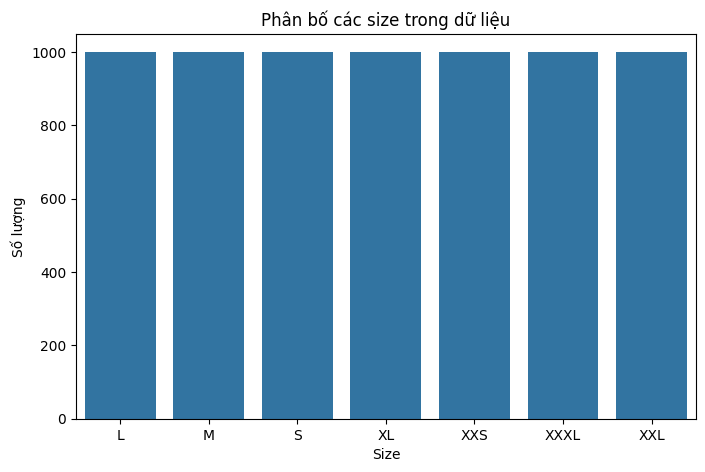

In [21]:
# ===== 1️⃣ Phân bố các size =====
plt.figure(figsize=(8,5))
sns.countplot(x='size', data=df, order=df['size'].value_counts().index)
plt.title("Phân bố các size trong dữ liệu")
plt.ylabel("Số lượng")
plt.xlabel("Size")
plt.show()

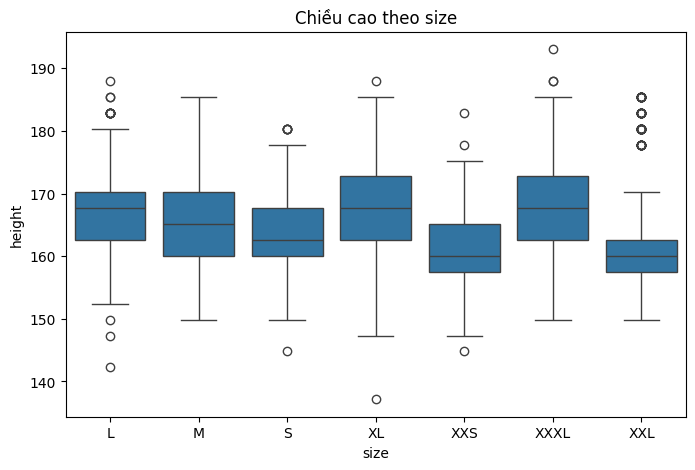

In [22]:
# ===== 2️⃣ Boxplot chiều cao theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='height', data=df, order=df['size'].value_counts().index)
plt.title("Chiều cao theo size")
plt.show()

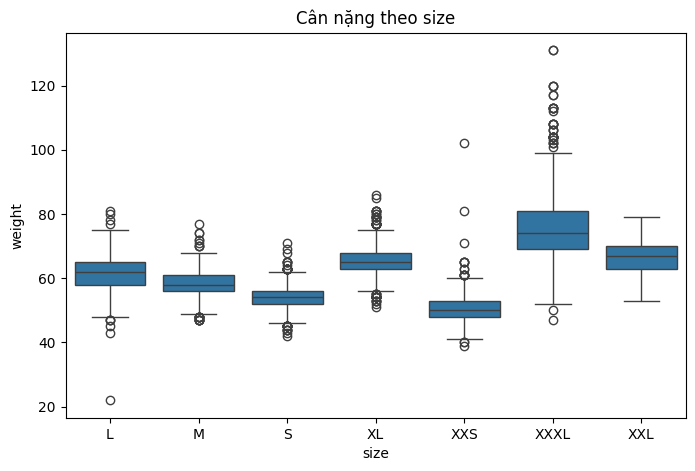

In [23]:
# ===== 3️⃣ Boxplot cân nặng theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='weight', data=df, order=df['size'].value_counts().index)
plt.title("Cân nặng theo size")
plt.show()

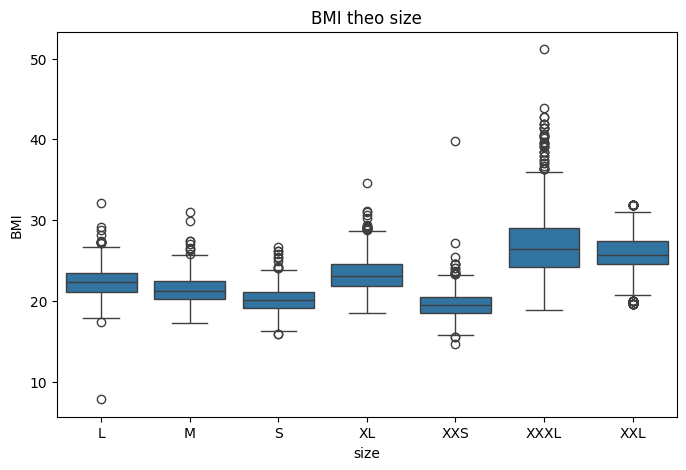

In [24]:
# ===== 4️⃣ Boxplot BMI theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='BMI', data=df, order=df['size'].value_counts().index)
plt.title("BMI theo size")
plt.show()

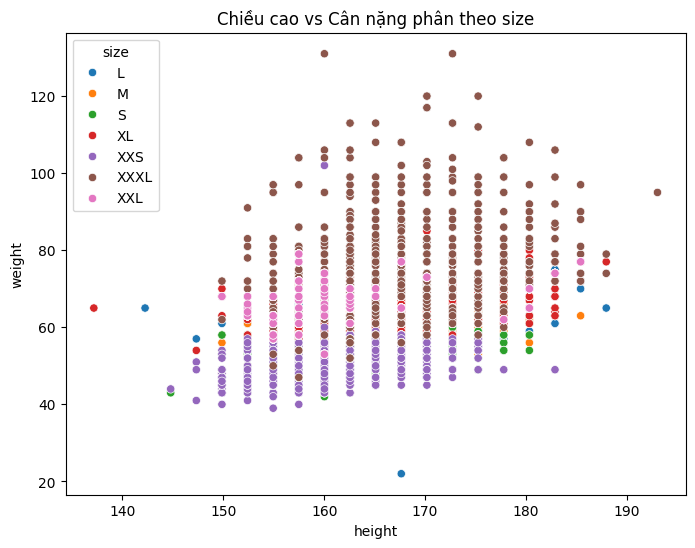

In [25]:
# ===== 5️⃣ Scatterplot chiều cao vs cân nặng =====
plt.figure(figsize=(8,6))
sns.scatterplot(x='height', y='weight', hue='size', data=df)
plt.title("Chiều cao vs Cân nặng phân theo size")
plt.show()

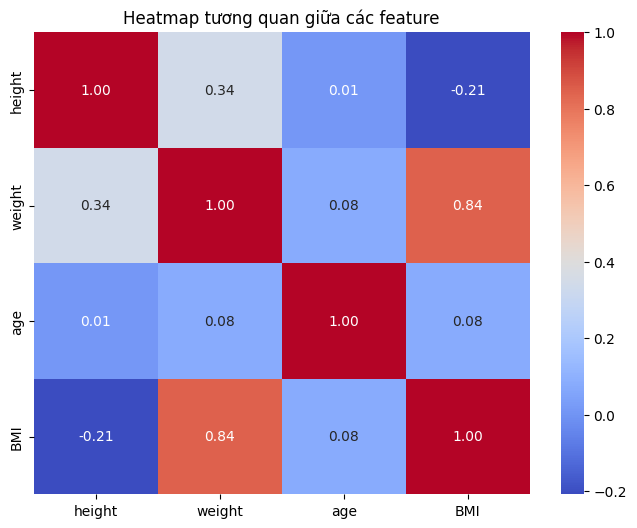

In [26]:
# ===== 6️⃣ Heatmap tương quan các feature =====
plt.figure(figsize=(8,6))
corr = df[['height', 'weight', 'age', 'BMI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap tương quan giữa các feature")
plt.show()

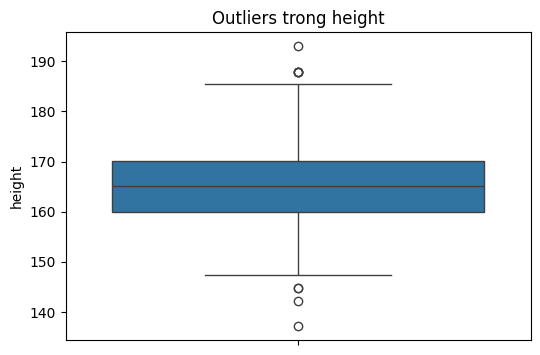

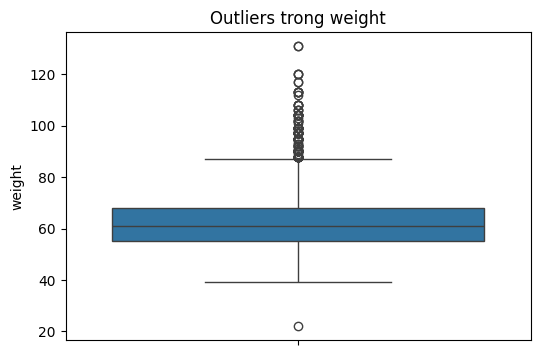

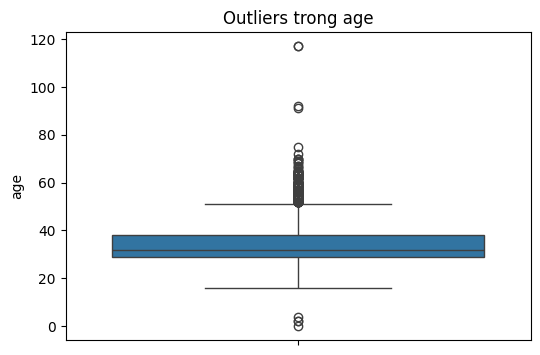

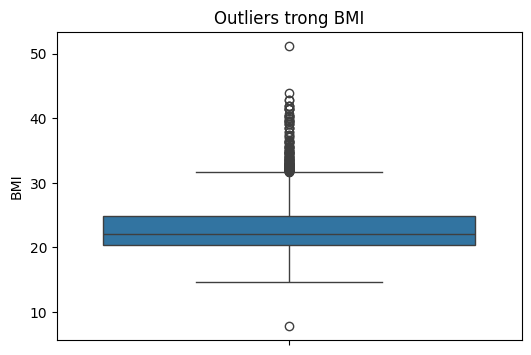

In [27]:
# ===== 7️⃣ Kiểm tra Outliers bằng Boxplot =====

# Hàm vẽ boxplot cho từng cột số để phát hiện outlier
def plot_box(column):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[column])
    plt.title(f"Outliers trong {column}")
    plt.show()

for col in ['height', 'weight', 'age', 'BMI']:
    plot_box(col)

# Compare model


==== Random Forest ====
Accuracy: 0.51
F1 macro: 0.51

==== KNN (k=5) ====
Accuracy: 0.51
F1 macro: 0.51


c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



==== Logistic Regression ====
Accuracy: 0.52
F1 macro: 0.52

==== CatBoost ====
Accuracy: 0.54
F1 macro: 0.53


c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [08:29:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



==== XGBoost ====
Accuracy: 0.56
F1 macro: 0.55
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 4
[LightGBM] [Info] Start training from score -1.949667
[LightGBM] [Info] Start training from score -1.976369
[LightGBM] [Info] Start training from score -1.918781
[LightGBM] [Info] Start training from score -1.964838
[LightGBM] [Info] Start training from score -1.928562
[LightGBM] [Info] Start training from score -1.924883
[LightGBM] [Info] Start training from score -1.959756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

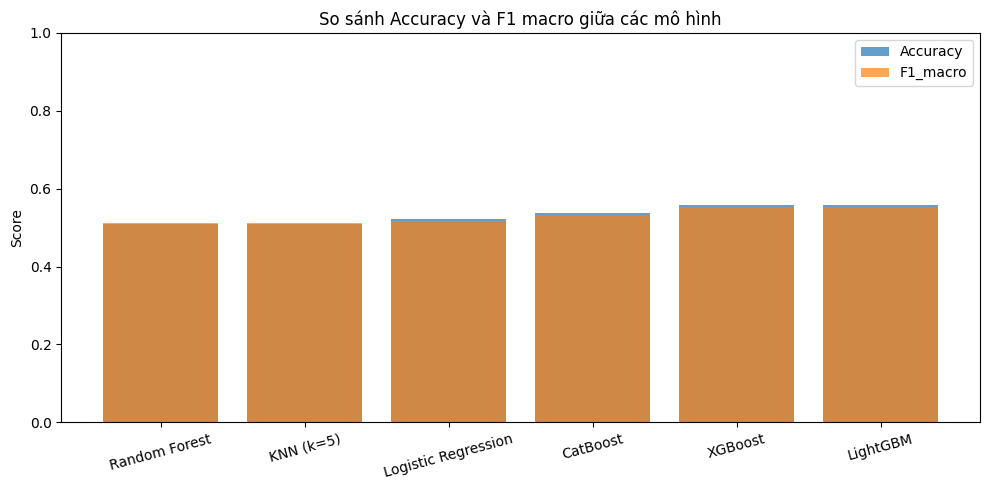

In [30]:



# Encode nhãn size
le = LabelEncoder()
df['size_encoded'] = le.fit_transform(df['size'])

# Tập features: KHÔNG dùng gender (vì file cũ chưa có)
X = df[['height', 'weight', 'age', 'BMI']]
y = df['size_encoded']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'CatBoost': CatBoostClassifier(iterations=300, depth=4, learning_rate=0.05, verbose=0, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
}

results = {"Model": [], "Accuracy": [], "F1_macro": []}

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    if name == 'CatBoost':
        model.fit(X_train, y_train)  # không cần cat_features vì không còn feature categorical
    else:
        model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1_macro"].append(f1)
    
    print(f"\n==== {name} ====")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 macro: {f1:.2f}")

# Vẽ biểu đồ
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["Accuracy"], label="Accuracy", alpha=0.7)
plt.bar(results_df["Model"], results_df["F1_macro"], label="F1_macro", alpha=0.7)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("So sánh Accuracy và F1 macro giữa các mô hình")
plt.xticks(rotation=15)
plt.legend()
plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()
